In [ ]:
import tensorflow as tf
import torch.nn as nn
import scipy
import numpy as np

# Read in Data

In [ ]:
!wget https://raw.githubusercontent.com/AI-Group-4-Classification-of-alcohols/TermProject/main/QCM3.csv

--2023-04-21 08:08:18--  https://raw.githubusercontent.com/AI-Group-4-Classification-of-alcohols/TermProject/main/QCM3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2160 (2.1K) [text/plain]
Saving to: ‘QCM3.csv’

QCM3.csv            100%[===================>]   2.11K  --.-KB/s    in 0s      

2023-04-21 08:08:19 (41.5 MB/s) - ‘QCM3.csv’ saved [2160/2160]



In [ ]:
import pandas as pd 
QCM3 = pd.read_csv("QCM3.csv", sep=";", dtype=np.float32)

In [ ]:
QCM3.head()

-10.06     -10.62      -14.43      -18.31      -24.64      -30.56  \
0  -9.690000 -10.860000  -16.730000  -21.750000  -28.469999  -35.830002   
1 -12.070000 -14.280000  -21.540001  -27.920000  -35.189999  -43.939999   
2 -14.210000 -17.410000  -25.910000  -33.360001  -41.290001  -51.270000   
3 -16.570000 -20.350000  -29.969999  -37.840000  -47.029999  -57.290001   
4 -75.610001 -64.099998 -122.080002 -102.169998 -174.789993 -145.500000   

       -38.62      -45.59      -54.89      -62.28    1    0  0.1  0.2  0.3  
0  -43.650002  -52.430000  -61.919998  -71.269997  1.0  0.0  0.0  0.0  0.0  
1  -52.040001  -62.490002  -71.970001  -83.099998  1.0  0.0  0.0  0.0  0.0  
2  -59.939999  -71.550003  -81.510002  -93.830002  1.0  0.0  0.0  0.0  0.0  
3  -67.129997  -78.959999  -90.010002 -102.650002  1.0  0.0  0.0  0.0  0.0  
4 -214.690002 -177.300003 -250.830002 -207.990005  0.0  1.0  0.0  0.0  0.0

# Build ANN Model

In [ ]:
X = QCM3.iloc[:,0:10].values
y = QCM3.iloc[:, [10,11,12,13,14]].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0) 

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#SGD Model

In [ ]:
model_sgd1 = tf.keras.Sequential()
model_sgd1.add(tf.keras.layers.Dense(units=40, activation="sigmoid",input_shape=(10,)))
model_sgd1.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd1.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd1 = model_sgd1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 67ms/step - loss: 0.1061 - accuracy: 0.7143 - val_loss: 0.1337 - val_accuracy: 0.3000
Epoch 7502/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1061 - accuracy: 0.7143 - val_loss: 0.1337 - val_accuracy: 0.3000
Epoch 7503/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1061 - accuracy: 0.7143 - val_loss: 0.1337 - val_accuracy: 0.3000
Epoch 7504/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1060 - accuracy: 0.7143 - val_loss: 0.1336 - val_accuracy: 0.3000
Epoch 7505/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1060 - accuracy: 0.7143 - val_loss: 0.1336 - val_accuracy: 0.3000
Epoch 7506/10000
1/1 [==============================] - 0s 80ms/step - loss: 0.1060 - accuracy: 0.7143 - val_loss: 0.1336 - val_accuracy: 0.3000
Epoch 7507/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.1060 - accuracy: 

In [ ]:
model_sgd2 = tf.keras.Sequential()
model_sgd2.add(tf.keras.layers.Dense(units=50, activation="sigmoid",input_shape=(10,)))
model_sgd2.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd2.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd2 = model_sgd2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 62ms/step - loss: 0.1048 - accuracy: 0.7143 - val_loss: 0.1306 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1048 - accuracy: 0.7143 - val_loss: 0.1306 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1048 - accuracy: 0.7143 - val_loss: 0.1306 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1048 - accuracy: 0.7143 - val_loss: 0.1306 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1048 - accuracy: 0.7143 - val_loss: 0.1306 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.1048 - accuracy: 0.7143 - val_loss: 0.1306 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1048 - accuracy: 

In [ ]:
model_sgd3 = tf.keras.Sequential()
model_sgd3.add(tf.keras.layers.Dense(units=60, activation="sigmoid",input_shape=(10,)))
model_sgd3.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd3.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd3 = model_sgd3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 67ms/step - loss: 0.1027 - accuracy: 0.7143 - val_loss: 0.1288 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1027 - accuracy: 0.7143 - val_loss: 0.1288 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 88ms/step - loss: 0.1027 - accuracy: 0.7143 - val_loss: 0.1288 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.1027 - accuracy: 0.7143 - val_loss: 0.1288 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.1027 - accuracy: 0.7143 - val_loss: 0.1288 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1027 - accuracy: 0.7143 - val_loss: 0.1288 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1027 - accuracy: 

In [ ]:
model_sgd4 = tf.keras.Sequential()
model_sgd4.add(tf.keras.layers.Dense(units=70, activation="sigmoid",input_shape=(10,)))
model_sgd4.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd4.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd4 = model_sgd4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 92ms/step - loss: 0.1069 - accuracy: 0.7143 - val_loss: 0.1360 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 92ms/step - loss: 0.1069 - accuracy: 0.7143 - val_loss: 0.1360 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1069 - accuracy: 0.7143 - val_loss: 0.1360 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 78ms/step - loss: 0.1069 - accuracy: 0.7143 - val_loss: 0.1360 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1069 - accuracy: 0.7143 - val_loss: 0.1359 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.1068 - accuracy: 0.7143 - val_loss: 0.1359 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1068 - accuracy: 

In [ ]:
model_sgd5 = tf.keras.Sequential()
model_sgd5.add(tf.keras.layers.Dense(units=80, activation="sigmoid",input_shape=(10,)))
model_sgd5.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd5.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd5 = model_sgd5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 65ms/step - loss: 0.1050 - accuracy: 0.7143 - val_loss: 0.1345 - val_accuracy: 0.3000
Epoch 7502/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1050 - accuracy: 0.7143 - val_loss: 0.1345 - val_accuracy: 0.3000
Epoch 7503/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.1050 - accuracy: 0.7143 - val_loss: 0.1345 - val_accuracy: 0.3000
Epoch 7504/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1050 - accuracy: 0.7143 - val_loss: 0.1345 - val_accuracy: 0.3000
Epoch 7505/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1050 - accuracy: 0.7143 - val_loss: 0.1345 - val_accuracy: 0.3000
Epoch 7506/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1050 - accuracy: 0.7143 - val_loss: 0.1345 - val_accuracy: 0.3000
Epoch 7507/10000
1/1 [==============================] - 0s 99ms/step - loss: 0.1049 - accuracy: 

In [ ]:
model_sgd6 = tf.keras.Sequential()
model_sgd6.add(tf.keras.layers.Dense(units=90, activation="sigmoid",input_shape=(10,)))
model_sgd6.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd6.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd6 = model_sgd6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.1055 - accuracy: 0.7143 - val_loss: 0.1342 - val_accuracy: 0.3000
Epoch 7502/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.1055 - accuracy: 0.7143 - val_loss: 0.1342 - val_accuracy: 0.3000
Epoch 7503/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.1055 - accuracy: 0.7143 - val_loss: 0.1342 - val_accuracy: 0.3000
Epoch 7504/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1055 - accuracy: 0.7143 - val_loss: 0.1342 - val_accuracy: 0.3000
Epoch 7505/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1055 - accuracy: 0.7143 - val_loss: 0.1342 - val_accuracy: 0.3000
Epoch 7506/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1055 - accuracy: 0.7143 - val_loss: 0.1342 - val_accuracy: 0.3000
Epoch 7507/10000
1/1 [==============================] - 0s 87ms/step - loss: 0.

# Adam Model

In [ ]:
model_adam1 = tf.keras.Sequential()
model_adam1.add(tf.keras.layers.Dense(units=40, activation="sigmoid",input_shape=(10,)))
model_adam1.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam1 = model_adam1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 50ms/step - loss: 2.6851e-05 - accuracy: 1.0000 - val_loss: 6.9820e-05 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 64ms/step - loss: 2.6836e-05 - accuracy: 1.0000 - val_loss: 6.9784e-05 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 62ms/step - loss: 2.6820e-05 - accuracy: 1.0000 - val_loss: 6.9748e-05 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 74ms/step - loss: 2.6805e-05 - accuracy: 1.0000 - val_loss: 6.9712e-05 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 49ms/step - loss: 2.6790e-05 - accuracy: 1.0000 - val_loss: 6.9676e-05 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 67ms/step - loss: 2.6774e-05 - accuracy: 1.0000 - val_loss: 6.9640e-05 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam2 = tf.keras.Sequential()
model_adam2.add(tf.keras.layers.Dense(units=50, activation="sigmoid",input_shape=(10,)))
model_adam2.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam2 = model_adam2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 59ms/step - loss: 4.1640e-05 - accuracy: 1.0000 - val_loss: 9.4706e-05 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 50ms/step - loss: 4.1616e-05 - accuracy: 1.0000 - val_loss: 9.4656e-05 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 46ms/step - loss: 4.1592e-05 - accuracy: 1.0000 - val_loss: 9.4606e-05 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 70ms/step - loss: 4.1568e-05 - accuracy: 1.0000 - val_loss: 9.4556e-05 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 56ms/step - loss: 4.1544e-05 - accuracy: 1.0000 - val_loss: 9.4506e-05 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 48ms/step - loss: 4.1521e-05 - accuracy: 1.0000 - val_loss: 9.4456e-05 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam3 = tf.keras.Sequential()
model_adam3.add(tf.keras.layers.Dense(units=60, activation="sigmoid",input_shape=(10,)))
model_adam3.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam3.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam3 = model_adam3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 58ms/step - loss: 2.2572e-05 - accuracy: 1.0000 - val_loss: 5.5356e-05 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 74ms/step - loss: 2.2559e-05 - accuracy: 1.0000 - val_loss: 5.5328e-05 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 64ms/step - loss: 2.2546e-05 - accuracy: 1.0000 - val_loss: 5.5299e-05 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 60ms/step - loss: 2.2533e-05 - accuracy: 1.0000 - val_loss: 5.5270e-05 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 64ms/step - loss: 2.2520e-05 - accuracy: 1.0000 - val_loss: 5.5242e-05 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 60ms/step - loss: 2.2507e-05 - accuracy: 1.0000 - val_loss: 5.5213e-05 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam4 = tf.keras.Sequential()
model_adam4.add(tf.keras.layers.Dense(units=70, activation="sigmoid",input_shape=(10,)))
model_adam4.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam4.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam4 = model_adam4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 62ms/step - loss: 1.3339e-05 - accuracy: 1.0000 - val_loss: 4.2446e-05 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 47ms/step - loss: 1.3332e-05 - accuracy: 1.0000 - val_loss: 4.2424e-05 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 39ms/step - loss: 1.3324e-05 - accuracy: 1.0000 - val_loss: 4.2403e-05 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 35ms/step - loss: 1.3316e-05 - accuracy: 1.0000 - val_loss: 4.2382e-05 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 34ms/step - loss: 1.3309e-05 - accuracy: 1.0000 - val_loss: 4.2360e-05 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 53ms/step - loss: 1.3301e-05 - accuracy: 1.0000 - val_loss: 4.2339e-05 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam5 = tf.keras.Sequential()
model_adam5.add(tf.keras.layers.Dense(units=80, activation="sigmoid",input_shape=(10,)))
model_adam5.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam5.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam5 = model_adam5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

In [ ]:
model_adam6 = tf.keras.Sequential()
model_adam6.add(tf.keras.layers.Dense(units=90, activation="sigmoid",input_shape=(10,)))
model_adam6.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam6.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam6 = model_adam6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 61ms/step - loss: 1.2915e-05 - accuracy: 1.0000 - val_loss: 4.1099e-05 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 58ms/step - loss: 1.2908e-05 - accuracy: 1.0000 - val_loss: 4.1079e-05 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 90ms/step - loss: 1.2900e-05 - accuracy: 1.0000 - val_loss: 4.1059e-05 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 78ms/step - loss: 1.2893e-05 - accuracy: 1.0000 - val_loss: 4.1039e-05 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 93ms/step - loss: 1.2886e-05 - accuracy: 1.0000 - val_loss: 4.1019e-05 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 81ms/step - loss: 1.2878e-05 - accuracy: 1.0000 - val_loss: 4.0999e-05 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

# RMSProp Model


In [ ]:
model_rms1 = tf.keras.Sequential()
model_rms1.add(tf.keras.layers.Dense(units=40, activation="sigmoid",input_shape=(10,)))
model_rms1.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms1.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms1 = model_rms1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 44ms/step - loss: 8.2404e-05 - accuracy: 1.0000 - val_loss: 2.1892e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 60ms/step - loss: 8.2390e-05 - accuracy: 1.0000 - val_loss: 2.1889e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 61ms/step - loss: 8.2376e-05 - accuracy: 1.0000 - val_loss: 2.1886e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 71ms/step - loss: 8.2362e-05 - accuracy: 1.0000 - val_loss: 2.1883e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 70ms/step - loss: 8.2349e-05 - accuracy: 1.0000 - val_loss: 2.1880e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 59ms/step - loss: 8.2335e-05 - accuracy: 1.0000 - val_loss: 2.1877e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_rms2 = tf.keras.Sequential()
model_rms2.add(tf.keras.layers.Dense(units=50, activation="sigmoid",input_shape=(10,)))
model_rms2.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms2.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms2 = model_rms2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 65ms/step - loss: 7.3702e-05 - accuracy: 1.0000 - val_loss: 1.9042e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 73ms/step - loss: 7.3690e-05 - accuracy: 1.0000 - val_loss: 1.9040e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 43ms/step - loss: 7.3678e-05 - accuracy: 1.0000 - val_loss: 1.9037e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 68ms/step - loss: 7.3666e-05 - accuracy: 1.0000 - val_loss: 1.9034e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 59ms/step - loss: 7.3654e-05 - accuracy: 1.0000 - val_loss: 1.9032e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 50ms/step - loss: 7.3642e-05 - accuracy: 1.0000 - val_loss: 1.9029e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_rms3 = tf.keras.Sequential()
model_rms3.add(tf.keras.layers.Dense(units=60, activation="sigmoid",input_shape=(10,)))
model_rms3.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms3.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms3 = model_rms3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 62ms/step - loss: 7.0760e-05 - accuracy: 1.0000 - val_loss: 1.9320e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 52ms/step - loss: 7.0748e-05 - accuracy: 1.0000 - val_loss: 1.9318e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 61ms/step - loss: 7.0736e-05 - accuracy: 1.0000 - val_loss: 1.9315e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 60ms/step - loss: 7.0725e-05 - accuracy: 1.0000 - val_loss: 1.9312e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 45ms/step - loss: 7.0713e-05 - accuracy: 1.0000 - val_loss: 1.9310e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 60ms/step - loss: 7.0701e-05 - accuracy: 1.0000 - val_loss: 1.9307e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_rms4 = tf.keras.Sequential()
model_rms4.add(tf.keras.layers.Dense(units=70, activation="sigmoid",input_shape=(10,)))
model_rms4.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms4.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms4 = model_rms4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 61ms/step - loss: 6.7787e-05 - accuracy: 1.0000 - val_loss: 1.9041e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 63ms/step - loss: 6.7776e-05 - accuracy: 1.0000 - val_loss: 1.9038e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 63ms/step - loss: 6.7765e-05 - accuracy: 1.0000 - val_loss: 1.9036e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 61ms/step - loss: 6.7754e-05 - accuracy: 1.0000 - val_loss: 1.9033e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 75ms/step - loss: 6.7743e-05 - accuracy: 1.0000 - val_loss: 1.9030e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 60ms/step - loss: 6.7732e-05 - accuracy: 1.0000 - val_loss: 1.9028e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_rms5 = tf.keras.Sequential()
model_rms5.add(tf.keras.layers.Dense(units=80, activation="sigmoid",input_shape=(10,)))
model_rms5.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms5.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms5 = model_rms5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 70ms/step - loss: 6.6849e-05 - accuracy: 1.0000 - val_loss: 1.9693e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 66ms/step - loss: 6.6838e-05 - accuracy: 1.0000 - val_loss: 1.9691e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 84ms/step - loss: 6.6827e-05 - accuracy: 1.0000 - val_loss: 1.9688e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 80ms/step - loss: 6.6816e-05 - accuracy: 1.0000 - val_loss: 1.9685e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 93ms/step - loss: 6.6805e-05 - accuracy: 1.0000 - val_loss: 1.9683e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 80ms/step - loss: 6.6794e-05 - accuracy: 1.0000 - val_loss: 1.9680e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_rms6 = tf.keras.Sequential()
model_rms6.add(tf.keras.layers.Dense(units=90, activation="sigmoid",input_shape=(10,)))
model_rms6.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms6.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms6 = model_rms6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 [==============================] - 0s 86ms/step - loss: 6.3654e-05 - accuracy: 1.0000 - val_loss: 1.8439e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 66ms/step - loss: 6.3644e-05 - accuracy: 1.0000 - val_loss: 1.8436e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 63ms/step - loss: 6.3634e-05 - accuracy: 1.0000 - val_loss: 1.8434e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 70ms/step - loss: 6.3623e-05 - accuracy: 1.0000 - val_loss: 1.8431e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 71ms/step - loss: 6.3613e-05 - accuracy: 1.0000 - val_loss: 1.8429e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 70ms/step - loss: 6.3602e-05 - accuracy: 1.0000 - val_loss: 1.8426e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [=========

# Examine Output

In [ ]:
test_loss, test_acc = model_sgd6.evaluate(X_test, y_test)
test_loss, test_acc = model_adam5.evaluate(X_test, y_test)
test_loss, test_acc = model_rms6.evaluate(X_test, y_test)

1/1 [==============================] - 0s 41ms/step - loss: 1.3798e-04 - accuracy: 1.0000


NameError: ignored

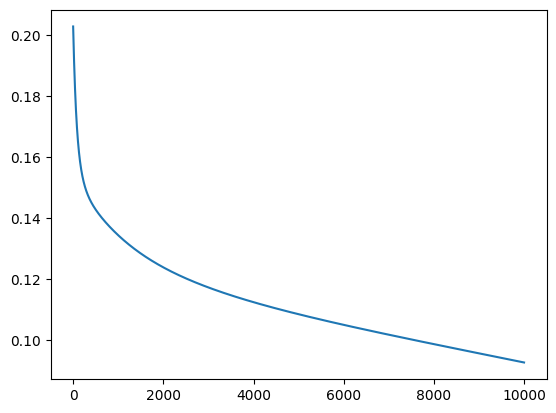

In [ ]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history_sgd6.history['loss'])
plt.plot(history_adam5.history['loss'])
plt.plot(history_rms6.history['loss'])
plt.title('MSE Comparison for QCM 3')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['SGD', 'Adam', 'RMSprop'])
plt.show()

# Plot validation accuracy
plt.plot(history_sgd6.history['val_accuracy'])
plt.plot(history_adam4.history['val_accuracy'])
plt.plot(history_rms6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['SGD', 'Adam', 'RMSprop'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history_sgd1.history['val_loss'])
plt.plot(history_sgd2.history['val_loss'])
plt.plot(history_sgd3.history['val_loss'])
plt.plot(history_sgd4.history['val_loss'])
plt.plot(history_sgd5.history['val_loss'])
plt.plot(history_sgd6.history['val_loss'])
plt.title('Validation Loss Comparison for SGD')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

# Plot validation accuracy
plt.plot(history1.history['val_accuracy'])
plt.plot(history_sgd2.history['val_accuracy'])
plt.plot(history_sgd3.history['val_accuracy'])
plt.plot(history_sgd4.history['val_accuracy'])
plt.plot(history_sgd5.history['val_accuracy'])
plt.plot(history_sgd6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison for SGD')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()




import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history_adam1.history['val_loss'])
plt.plot(history_adam2.history['val_loss'])
plt.plot(history_adam3.history['val_loss'])
plt.plot(history_adam4.history['val_loss'])
plt.plot(history_adam5.history['val_loss'])
plt.plot(history_adam6.history['val_loss'])
plt.title('Validation Loss Comparison for Adam')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

# Plot validation accuracy
plt.plot(history_adam1.history['val_accuracy'])
plt.plot(history_adam2.history['val_accuracy'])
plt.plot(history_adam3.history['val_accuracy'])
plt.plot(history_adam4.history['val_accuracy'])
plt.plot(history_adam5.history['val_accuracy'])
plt.plot(history_adam6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison for Adam')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()




import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history_rms1.history['val_loss'])
plt.plot(history_rms2.history['val_loss'])
plt.plot(history_rms3.history['val_loss'])
plt.plot(history_rms4.history['val_loss'])
plt.plot(history_rms5.history['val_loss'])
plt.plot(history_rms6.history['val_loss'])
plt.title('Validation Loss Comparison for RMSProp')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

# Plot validation accuracy
plt.plot(history_rms1.history['val_accuracy'])
plt.plot(history_rms2.history['val_accuracy'])
plt.plot(history_rms3.history['val_accuracy'])
plt.plot(history_rms4.history['val_accuracy'])
plt.plot(history_rms5.history['val_accuracy'])
plt.plot(history_rms6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison for RMSProp')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

NameError: ignored